# Задание 4

Используя интегральное представление для функций Бесселя целого индекса m:

$$J_{m}(x) = \frac{1}{\pi }\int_{0}^{\pi}cos(mt - xsint)dt$$

и вычисляя производную с помощью конечной разности в тех же точках, что и сам
интеграл, продемонстрировать выполнение равенства

$${J_{0}^{'}}(x) + J_{1}(x) = 0$$

с точностью не хуже 10^−10 на отрезке x ∈ [0, 2π].

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Trapezoidal(left, right, f):
    return (f(left) + f(right))/2

In [3]:
def Simpson(left, right, f):
    return (f(left) + 4 * f((left+right)/2)+f(right)) /6

In [4]:
def Integrate(a, b, N, f, rule):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) /N
    _sum = 0
    left = a
    right = a + h
    for i in range (0, N):
        _sum += rule(left, right, f)
        left += h
        right+= h
    return _sum * h

In [7]:
def f(x):
    return x**(1/3)*e**(np.sin(x))

In [8]:
Integrate(0, 1, 15, f, Simpson)

1.2944109102483246

In [9]:
def BesselFunctionSimpson(m, x, N = 100):
    def Integrand(t):
        return cos(m*t - x*sin(t))
    return 1/pi * Integrate(0, pi, N, Integrand, Simpson)

In [10]:
def BesselFunctionTrapezoidal(m, x, N = 100):
    def Integrand(t):
        return cos(m*t - x*sin(t))
    return 1/pi * Integrate(0, pi, N, Integrand, Trapezoidal)

In [11]:
def FiniteDifferenceDerivateFirst(f, x, m, h):
    return (f(m, x + h) - f(m, x)) / h

In [12]:
def FiniteDifferenceDerivateSecond(f, x, m, h):
    return (f(m, x + h/2) - f(m, x - h/2)) / h

In [13]:
N = 100
a = 0
b = 2 * pi
h = (b - a)/ N

Text(0.5, 1.0, 'Трапеций, Второй п.а')

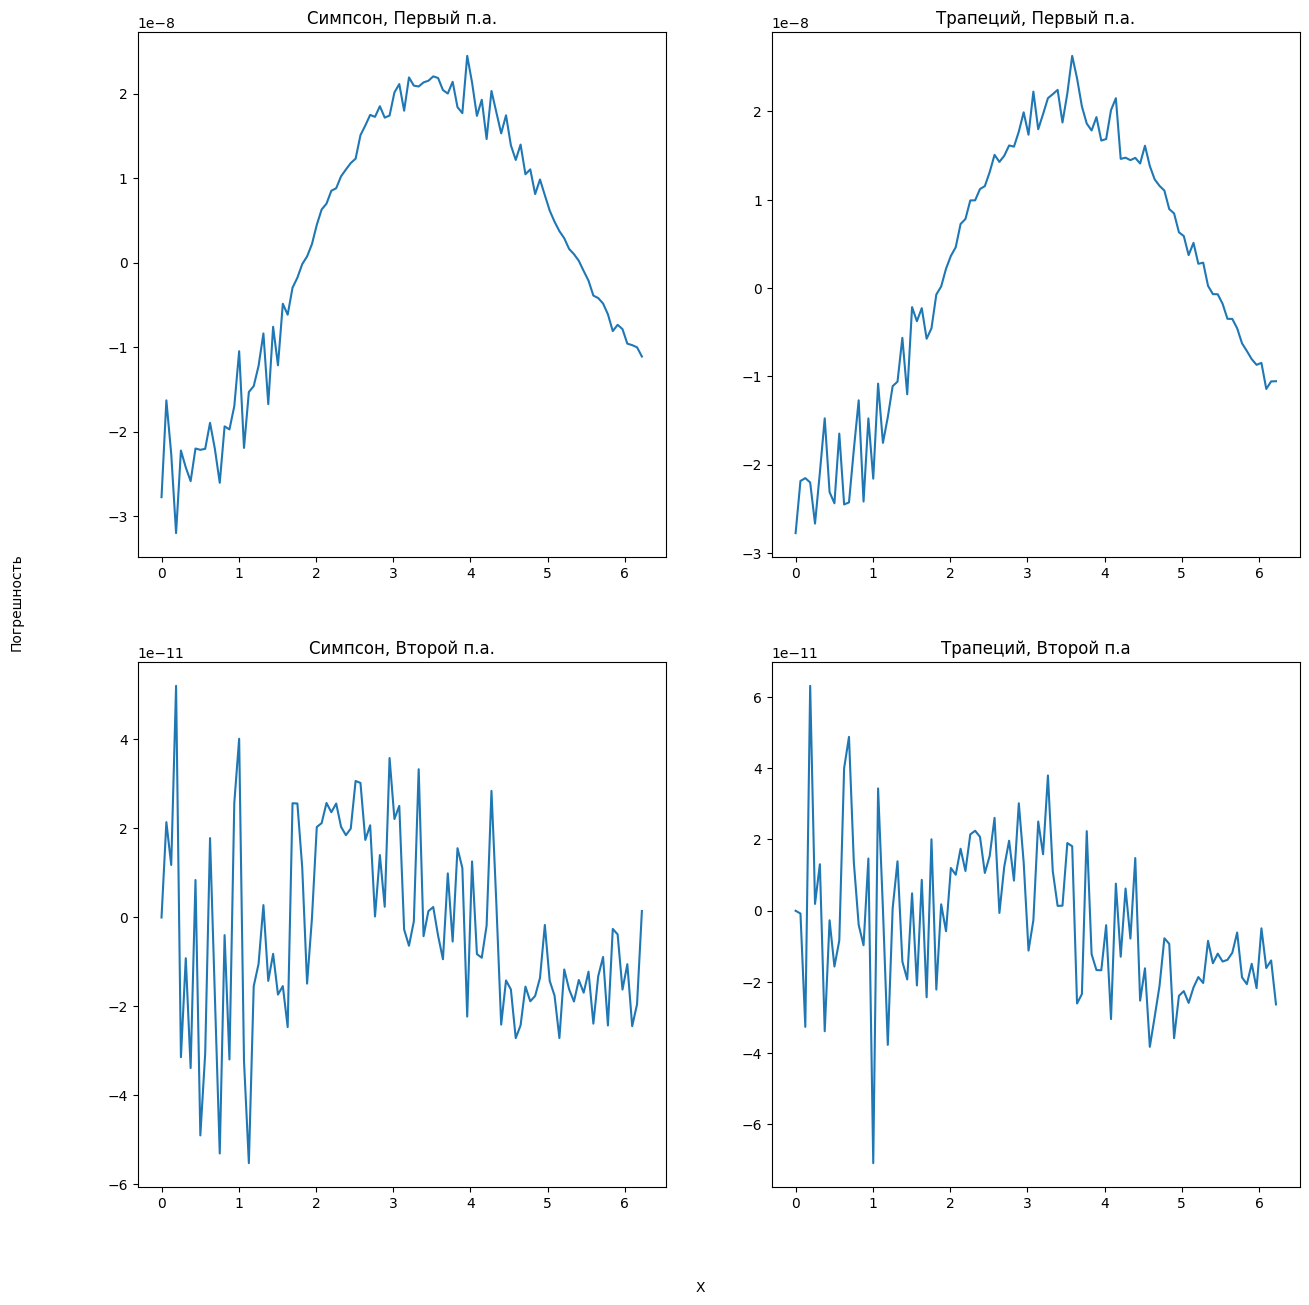

In [14]:
SF = []
TF = []
SS = []
TS = []
X = []
for i in range(0, N):
    x = a + i*h
    ISF = BesselFunctionSimpson(1,x, 20_000) + FiniteDifferenceDerivateFirst(BesselFunctionSimpson, x, 0, 1e-7)
    ITF = BesselFunctionTrapezoidal(1, x, 20_000) + FiniteDifferenceDerivateFirst(BesselFunctionTrapezoidal, x, 0, 1e-7)
    ISS = BesselFunctionSimpson(1, x, 10_000) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, 1e-5)
    ITS = BesselFunctionTrapezoidal(1, x, 10_000) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, 1e-5)
    X.append(x)
    SF.append(ISF)
    TF.append(ITF)
    SS.append(ISS)
    TS.append(ITS)
    
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0, 0].plot(X, SF)
axs[0, 0].set_title("Симпсон, Первый п.а.")
axs[0, 1].plot(X, TF)
axs[0, 1].set_title("Трапеций, Первый п.а.")
axs[1, 0].plot(X, SS)
axs[1, 0].set_title("Симпсон, Второй п.а.")
axs[1, 1].plot(X, TS)
axs[1, 1].set_title("Трапеций, Второй п.а")


In [15]:
N = 1000
h = (b - a)/ N

In [16]:
delta = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10]
          
SFM = []
TFM = []
SSM = []
TSM = []
for d in delta:
    SF = []
    TF = []
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISF = BesselFunctionSimpson(1, x, 20_000) + FiniteDifferenceDerivateFirst(BesselFunctionSimpson, x, 0, d)
        ITF = BesselFunctionTrapezoidal(1, x, 20_000) + FiniteDifferenceDerivateFirst(BesselFunctionTrapezoidal, x, 0, d)
        ISS = BesselFunctionSimpson(1, x, 10_000) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, 10_000) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SF.append(ISF)
        TF.append(ITF)
        SS.append(ISS)
        TS.append(ITS)
    SFM.append(abs(max(SF, key=abs)))
    TFM.append(abs(max(TF, key=abs)))
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.text(0.5, 0.04, "Шаг", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0, 0].plot(delta, YSFM)
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].set_title("Симпсон, Первый п.а.")
axs[0, 1].plot(delta, YTFM)
axs[0, 1].set_xscale('log')
axs[0, 1].set_yscale('log')
axs[0, 1].set_title("Трапеций, Первый п.а.")
axs[1, 0].plot(delta, YSSM)
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_title("Симпсон, Второй п.а.")
axs[1, 1].plot(delta, YTSM)
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_title("Трапеций, Второй п.а")

KeyboardInterrupt: 

In [ ]:
d = 1e-5
A = np.arange(10_000, 1000, -1000)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


In [ ]:
d = 1e-5
A = np.arange(2000, 50, -100)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


In [ ]:
d = 1e-5
A = np.arange(500, 10, -10)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


Text(0.5, 1.0, 'Трапеций, Второй п.а')

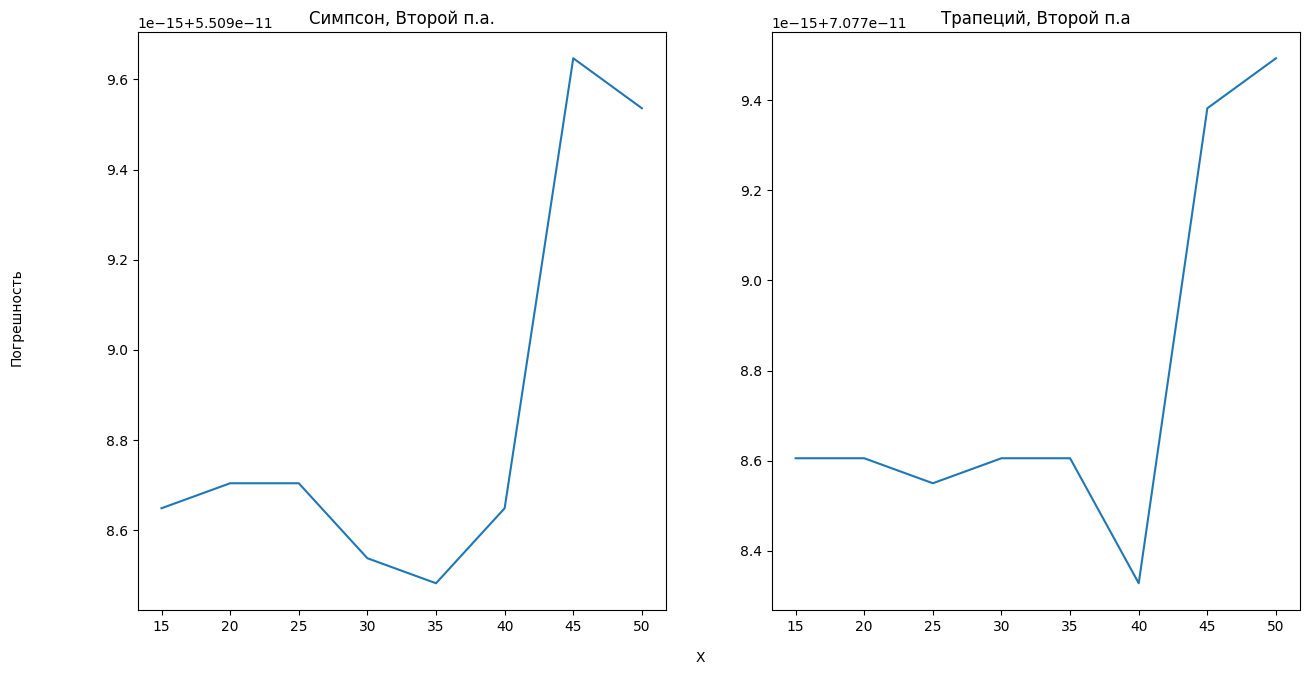

In [55]:
d = 1e-5
A = np.arange(50, 10, -5)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


Text(0.5, 1.0, 'Трапеций, Второй п.а')

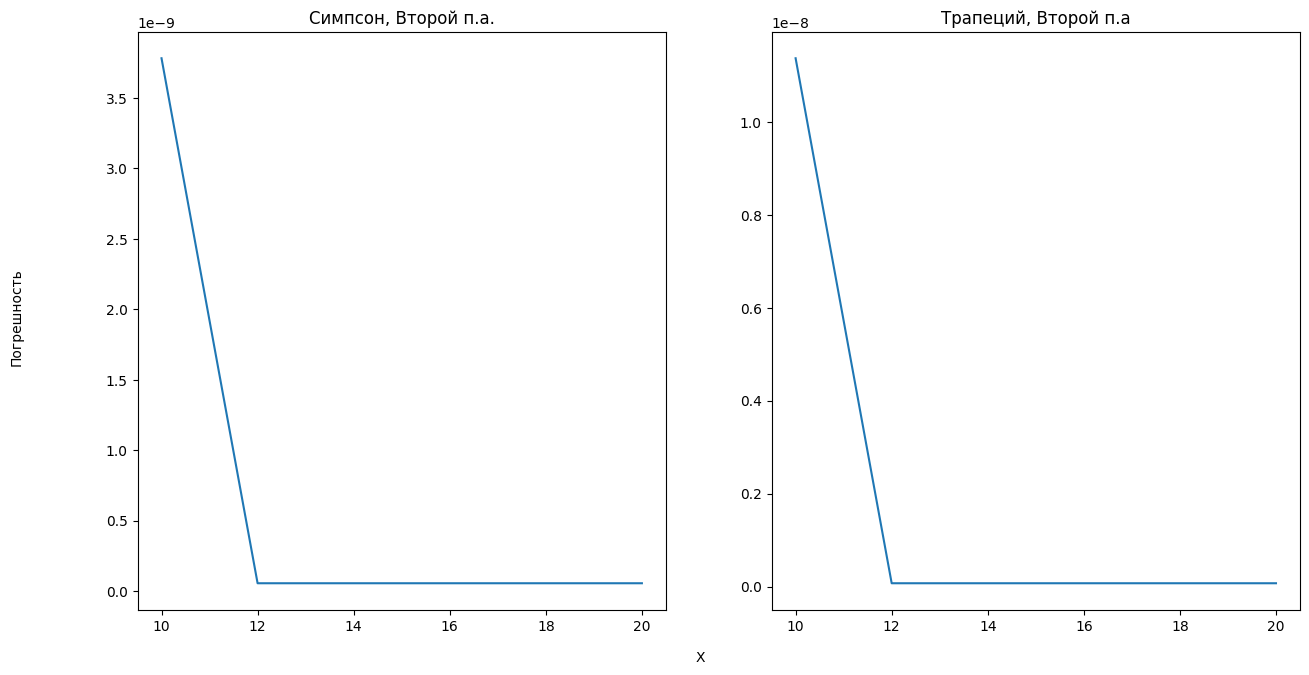

In [61]:
d = 1e-5
A = np.arange(20, 8, -2)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


Text(0.5, 1.0, 'Трапеций, Второй п.а')

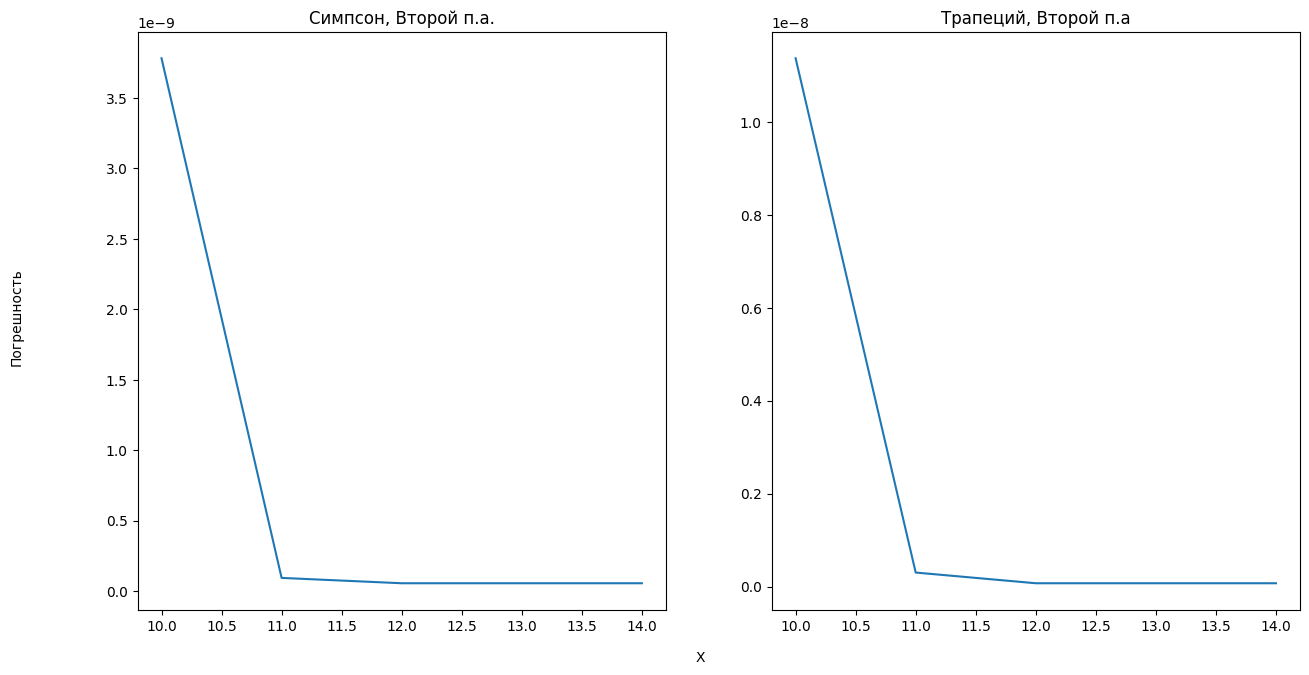

In [63]:
d = 1e-5
A = np.arange(14, 9, -1)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


Text(0.5, 1.0, 'Трапеций, Второй п.а')

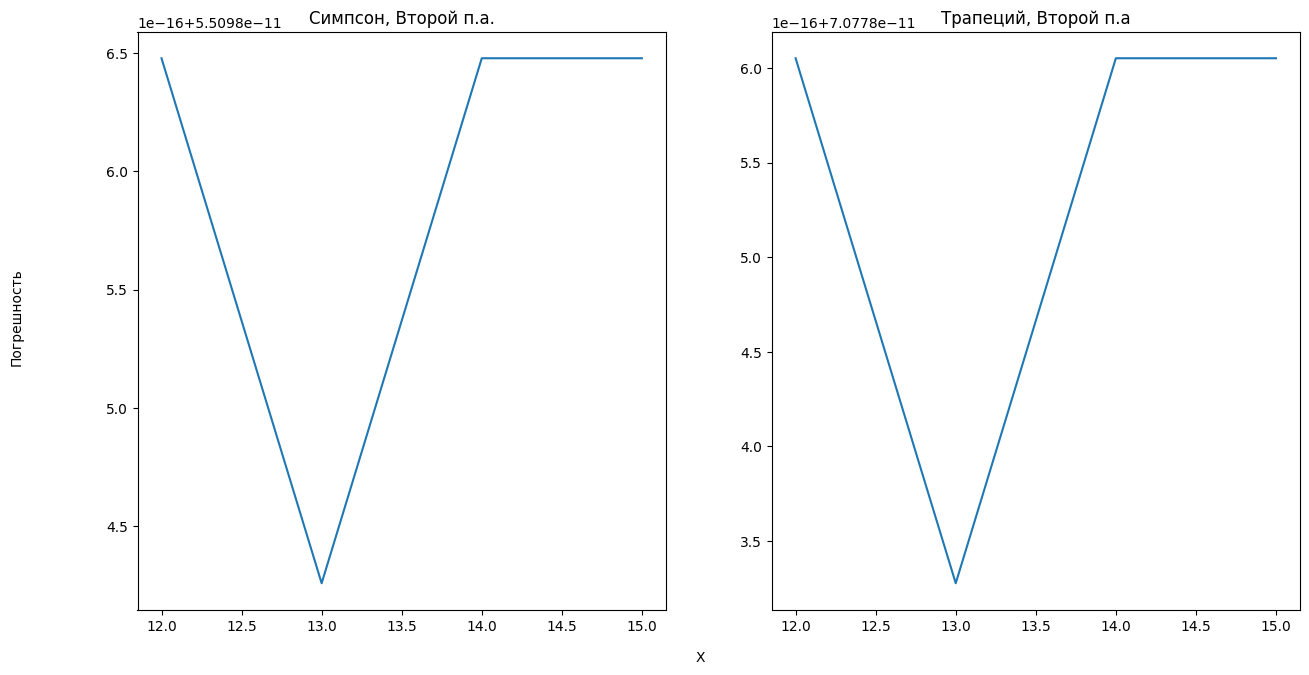

In [69]:
d = 1e-5
A = np.arange(15,11,-1)
SSM = []
TSM = []
for k in A:
    SS = []
    TS = []
    for i in range(0, N):
        x = a + i*h
        ISS = BesselFunctionSimpson(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionSimpson, x, 0, d)
        ITS = BesselFunctionTrapezoidal(1, x, k) + FiniteDifferenceDerivateSecond(BesselFunctionTrapezoidal, x, 0, d)
        SS.append(ISS)
        TS.append(ITS)
    SSM.append(abs(max(SS, key=abs)))
    TSM.append(abs(max(TS, key=abs)))
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
fig.text(0.5, 0.04, "X", ha='center')
fig.text(0.04, 0.5, "Погрешность", va='center', rotation='vertical')
axs[0].plot(A ,SSM)
axs[0].set_title("Симпсон, Второй п.а.")
axs[1].plot(A, TSM)
axs[1].set_title("Трапеций, Второй п.а")


In [23]:
def f(x):
    return (x**(1/3))*exp(np.sin(x))

n1 = 20
n2 = n1 *2
n3 = n2*2

a = 0.1
b = 1
res = 1.259
meth = Trapezoidal

val1 = Integrate(a, b, n1, f, meth)
val2 = Integrate(a, b, n2, f, meth)
val3 = Integrate(a, b, n3, f, meth)

np.log2(abs((val2-val1)/(val3 - val2)))

1.9622041456751649

In [22]:
def f(x):
    return x**(1/3)*exp(np.sin(x))

n1 = 20
n2 = 40
n3 = 80
a = 0.1
b = 1
res = 1.259
meth = Simpson

val1 = Integrate(a, b, n1, f, meth)
val2 = Integrate(a, b, n2, f, meth)
val3 = Integrate(a, b, n3, f, meth)

print(f"{val1=}, {val2=}")
print(val3 - val1)
print(res - val2)

np.log2(abs((val2 - val1)/(val3 - val2)))

val1=1.2590031064474136, val2=1.2590033154522073
2.2261753196417544e-07
-3.3154522074418935e-06


3.9405068256425038

In [59]:
def find_order_accuracy( a, b, n1, n2, meth, res):   
    def f(x):
        return (x**(1/3))*exp(np.sin(x))



    val1 = abs(Integrate(a, b, n1, f, meth))
    val2 = abs(Integrate(a, b, n2, f, meth))

    return np.log2(abs((res - val1)/(res - val2)))

In [60]:
a = 0.1
b = 1
res = 1.259
meth = Trapezoidal
for i in range(100, 1000, 100):
    print("-"*40)
    print(i)
    print(find_order_accuracy(a, b , i, i*2, meth, res))
    print("-"*40)

----------------------------------------
100
-0.5677616181713601
----------------------------------------
----------------------------------------
200
-0.11293018455868302
----------------------------------------
----------------------------------------
300
-0.04842629917742811
----------------------------------------
----------------------------------------
400
-0.026910654158812553
----------------------------------------
----------------------------------------
500
-0.017127241283006057
----------------------------------------
----------------------------------------
600
-0.01185821253565888
----------------------------------------
----------------------------------------
700
-0.00869642612709899
----------------------------------------
----------------------------------------
800
-0.006650411021861043
----------------------------------------
----------------------------------------
900
-0.005250416015840186
----------------------------------------
